# Импорты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import seaborn as sns

sns.set()
np.set_printoptions(suppress=False)
pd.options.display.float_format = '{:.2f}'.format

from collections import Counter

# Константы

In [3]:
DATA_PATH = './data/'
OLD_DATA_PATH = './old_data/'

# Вспомогательные функции

In [4]:
def get_describe(data):
    res = data.describe(include='all').T
    med = data.median()
    nul = data.isnull().sum()
    res.insert(1, 'nulls', nul)
    res.insert(5, 'median', med)
    
    return res

In [5]:
def del_const_nulls(data_info, data):
    const_cols = data_info[data_info['unique'] == 1].index.tolist()
    null_cols = data_info[data_info['count'] == 0].index.tolist()
    
    return data.drop(np.r_[null_cols, const_cols], axis=1)

# Исходные данные

In [7]:
# df = pd.read_excel(OLD_DATA_PATH + 'Люберцы_4_очередь_Данные_по_квартирам.xlsx', thousands='.')
# df_2 = pd.read_excel(OLD_DATA_PATH + 'Пригород_2_очередь_данные_по_квартирам.xlsx', thousands='.')
# df_3 = pd.read_excel(OLD_DATA_PATH + 'Путилково_2_очередь_данные_по_квартирам.xlsx', thousands='.')

In [8]:
# df.to_csv(OLD_DATA_PATH + 'люберцы.csv', index=False, sep=';')
# df_2.to_csv(OLD_DATA_PATH + 'пригород.csv', index=False, sep=';')
# df_3.to_csv(OLD_DATA_PATH + 'путилково.csv', index=False, sep=';')

In [9]:
df = pd.read_csv(OLD_DATA_PATH + 'люберцы.csv', sep=';')
df_2 = pd.read_csv(OLD_DATA_PATH + 'пригород.csv', sep=';')
df_3 = pd.read_csv(OLD_DATA_PATH + 'путилково.csv', sep=';')

# Предобработка

## Люберцы

In [10]:
list(df)

['Код объекта',
 'Дата продажи',
 'Месяц продаж',
 'Год продажи',
 'Застройка (Адрес (строение)) (Адрес (строение))',
 'Очередь (Адрес (строение)) (Адрес (строение))',
 'Этап',
 'Тип объекта',
 'Под тип объекта',
 'Номер корпуса (Адрес (строение)) (Адрес (строение))',
 'Ссылка на планировку',
 'Продано?',
 'Всего',
 'Этаж (ряд)',
 'Секция',
 'Планировка',
 'Условный номер',
 'Cтудийности',
 'Площадь по проекту общая (расчетная)',
 'Состояние объекта',
 'Начало действия (Предмет договора) (Предмет договора)',
 'Комнат',
 'Номер п/п секции (размещения)',
 'Номер на площадке (в ряду)',
 'Площадь по БТИ общая (расчетная)',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Площадь кухни',
 'Стоимость со скидкой',
 'Дата создания (Клиентский договор (оптовый)) (Договор (сделка))']

In [11]:
df_cols = ['Код объекта',
 'Месяц продаж',
 'Год продажи',
 'Застройка (Адрес (строение)) (Адрес (строение))',
 'Очередь (Адрес (строение)) (Адрес (строение))',
 'Этап',
 'Тип объекта',
 'Под тип объекта',
 'Номер корпуса (Адрес (строение)) (Адрес (строение))',
 'Этаж (ряд)',
 'Планировка',
 'Cтудийности',
 #'Площадь по проекту общая (расчетная)',
 'Состояние объекта',
 'Комнат',
 'Номер п/п секции (размещения)',
 'Номер на площадке (в ряду)',
 'Площадь по БТИ общая (расчетная)',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 #'Площадь кухни',
 'Стоимость со скидкой']

In [12]:
df_descr = get_describe(df[df_cols])
df_descr

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Код объекта,3402,0,3402,ЛЮБ4/1К42-4-02-04-192,1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Месяц продаж,3377.00,25,NaN,NaN,NaN,8.00,7.21,3.02,1.00,5.00,8.00,10.00,12.00
Год продажи,3377.00,25,NaN,NaN,NaN,2018.00,2017.63,0.62,2017.00,2017.00,2018.00,2018.00,2019.00
Застройка (Адрес (строение)) (Адрес (строение)),3402,0,1,ЛЮБЕРЦЫ,3402,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Очередь (Адрес (строение)) (Адрес (строение)),3402,0,1,4 очередь,3402,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этап,3402,0,2,2 этап,2045,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип объекта,3402,0,2,Жилое,3300,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Под тип объекта,3402,0,2,квартира,3300,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер корпуса (Адрес (строение)) (Адрес (строение)),3402.00,0,NaN,NaN,NaN,45.00,44.94,3.67,38.00,42.00,45.00,48.00,51.00
Этаж (ряд),3402.00,0,NaN,NaN,NaN,9.00,9.00,4.68,1.00,5.00,9.00,13.00,17.00


In [13]:
df = df[df_cols].copy(deep=True)

In [14]:
df.sample(5).T

,1299,3130,1272,1521,2974
Код объекта,ЛЮБ4/1К43-2-07-01-074,ЛЮБ4/2К50-4-04-04-220,ЛЮБ4/2К45-3-03-02-152,ЛЮБ4/2К51-1-06-06-046,ЛЮБ4/2К49-2-07-02-091
Месяц продаж,11.00,1.00,11.00,1.00,11.00
Год продажи,2017.00,2019.00,2017.00,2018.00,2018.00
Застройка (Адрес (строение)) (Адрес (строение)),ЛЮБЕРЦЫ,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ
Очередь (Адрес (строение)) (Адрес (строение)),4 очередь,4 очередь,4 очередь,4 очередь,4 очередь
Этап,1 этап,2 этап,2 этап,2 этап,2 этап
Тип объекта,Жилое,Жилое,Жилое,Жилое,Жилое
Под тип объекта,квартира,квартира,квартира,квартира,квартира
Номер корпуса (Адрес (строение)) (Адрес (строение)),43,50,45,51,49
Этаж (ряд),7,4,3,6,7


### Переименование колонок

In [15]:
df_rename_dict = {'Застройка (Адрес (строение)) (Адрес (строение))': 'Застройка', 
                  'Очередь (Адрес (строение)) (Адрес (строение))': 'Очередь',
                  'Номер корпуса (Адрес (строение)) (Адрес (строение))': 'Номер корпуса',
                  'Месяц продажи': 'Месяц продаж',
                  'Год продажи': 'Год продаж',
                  'Планировка': 'Тип планировки'
                 }

df.rename(columns=df_rename_dict, inplace=True)
df

,Код объекта,Месяц продаж,Год продаж,Застройка,Очередь,Этап,Тип объекта,Под тип объекта,Номер корпуса,Этаж (ряд),Тип планировки,Cтудийности,Состояние объекта,Комнат,Номер п/п секции (размещения),Номер на площадке (в ряду),Площадь по БТИ общая (расчетная),Площадь по БТИ без летних,Площадь по БТИ жилая,Стоимость со скидкой
0,ЛЮБ4/1К39-3-02-02-146,6.00,2017.00,ЛЮБЕРЦЫ,4 очередь,1 этап,Жилое,квартира,39,2,1А,1ккв,Продажа,1.00,3,2,33.20,33.20,12.40,2051973.14
1,ЛЮБ4/1К38-2-16-03-121,6.00,2017.00,ЛЮБЕРЦЫ,4 очередь,1 этап,Жилое,квартира,38,16,1В,1ккв,Продажа,1.00,2,3,34.30,32.00,10.60,2139291.00
2,ЛЮБ4/1К38-2-17-03-126,6.00,2017.00,ЛЮБЕРЦЫ,4 очередь,1 этап,Жилое,квартира,38,17,1В,1ккв,Продажа,1.00,2,3,34.30,32.00,10.70,2139291.00
3,ЛЮБ4/1К39-3-02-05-149,6.00,2017.00,ЛЮБЕРЦЫ,4 очередь,1 этап,Жилое,квартира,39,2,2Г,2ккв(с),Продажа,2.00,3,5,44.60,44.60,23.20,2750517.00
4,ЛЮБ4/1К39-2-02-03-067,6.00,2017.00,ЛЮБЕРЦЫ,4 очередь,1 этап,Жилое,квартира,39,2,1В,1ккв,Продажа,1.00,2,3,39.80,39.80,14.20,2501037.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,ЛЮБ4/2КН49-3-01-02-006,nan,nan,ЛЮБЕРЦЫ,4 очередь,2 этап,Нежилое,нежилое,49,1,NaN,Студия,Стр. Резерв,nan,3,2,102.10,102.10,nan,11261630.00
3398,ЛЮБ4/2КН50-2-01-02-004,nan,nan,ЛЮБЕРЦЫ,4 очередь,2 этап,Нежилое,нежилое,50,1,NaN,Студия,Свободно,nan,2,2,85.00,85.00,nan,9970500.00
3399,ЛЮБ4/2КН50-2-01-03-005,nan,nan,ЛЮБЕРЦЫ,4 очередь,2 этап,Нежилое,нежилое,50,1,NaN,Студия,Свободно,nan,2,3,87.70,87.70,nan,9822400.00
3400,ЛЮБ4/2КН50-3-01-02-007,nan,nan,ЛЮБЕРЦЫ,4 очередь,2 этап,Нежилое,нежилое,50,1,NaN,Студия,Оценка,nan,3,2,50.10,50.10,nan,5771520.00


In [16]:
df[df['Тип планировки'].notnull()]['Тип планировки'].apply(len).value_counts()

2    832
3    484
Name: Тип планировки, dtype: int64

In [17]:
df[df['Тип планировки'].notnull()].sample(5).T

,2213,2024,29,2931,1469
Код объекта,ЛЮБ4/1К38-2-13-02-105,ЛЮБ4/1К44-1-16-02-100,ЛЮБ4/1К43-2-09-04-087,ЛЮБ4/1К43-1-12-02-042,ЛЮБ4/1К39-1-09-01-029
Месяц продаж,6.00,4.00,6.00,11.00,12.00
Год продаж,2018.00,2018.00,2017.00,2018.00,2017.00
Застройка,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ,ЛЮБЕРЦЫ
Очередь,4 очередь,4 очередь,4 очередь,4 очередь,4 очередь
Этап,1 этап,1 этап,1 этап,1 этап,1 этап
Тип объекта,Жилое,Жилое,Жилое,Жилое,Жилое
Под тип объекта,квартира,квартира,квартира,квартира,квартира
Номер корпуса,38,44,43,43,39
Этаж (ряд),13,16,9,12,9


## Пригород

In [18]:
set(df).intersection(df_2)

{'Cтудийности',
 'Застройка',
 'Код объекта',
 'Комнат',
 'Номер корпуса',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Под тип объекта',
 'Состояние объекта',
 'Стоимость со скидкой',
 'Тип объекта',
 'Тип планировки',
 'Этап'}

In [19]:
df_2_descr = get_describe(df_2)
df_2_descr

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Отделка,1744,0,1,Да,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Описание,11,1733,2,ПОКА НЕ ПРОДАВАТЬ! ДЛЯ АДМИНИСТРАЦИИ. СИРОТЫ.,10,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип планировки,1744,0,137,1-36-Л-Д(1.1),33,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Вариант отделки,0.00,1744,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Вариант отделки.1,0.00,1744,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Застройка,1744,0,1,ПРИГОРОД,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Очередь,1744,0,1,2 очередь,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этап,1744,0,2,2 этап,1060,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип объекта,1744,0,1,Жилое,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Под тип объекта,1744,0,1,квартира,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
list(df_2)

['Отделка',
 'Описание',
 'Тип планировки',
 'Вариант отделки',
 'Вариант отделки.1',
 'Застройка',
 'Очередь ',
 'Этап',
 'Тип объекта',
 'Под тип объекта',
 'Номер корпуса',
 'Этаж',
 'Условный номер',
 'Cтудийности',
 'Площадь по проекту общая',
 'Цена продажи',
 'Стоимость продажи',
 'Состояние объекта',
 'Цена',
 'Модель',
 'Комнат',
 'Код объекта',
 'Номер п/п секции',
 'Номер на площадке',
 'Тип скидки',
 'Площадь по БТИ общая',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Дата документа',
 'Адрес',
 'Стоимость со скидкой',
 'Дата продажи']

In [21]:
df_2_cols = ['Тип планировки',
 #'Отделка',
 'Застройка',
 'Очередь ',
 'Этап',
 'Тип объекта',
 'Под тип объекта',
 'Номер корпуса',
 'Этаж',
 'Cтудийности',
 #'Площадь по проекту общая',
 #'Цена продажи',
 #'Стоимость продажи',
 'Состояние объекта',
 #'Цена',
 'Комнат',
 'Код объекта',
 'Номер п/п секции',
 'Номер на площадке',
 'Площадь по БТИ общая',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Стоимость со скидкой', 
'Дата продажи']

In [22]:
df_2 = df_2[df_2_cols].copy(deep=True)

In [23]:
df_2_descr = get_describe(df_2)

In [24]:
df_2_descr

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Тип планировки,1744,0,137,1-36-Л-Д(1.1),33,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Застройка,1744,0,1,ПРИГОРОД,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Очередь,1744,0,1,2 очередь,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этап,1744,0,2,2 этап,1060,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип объекта,1744,0,1,Жилое,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Под тип объекта,1744,0,1,квартира,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер корпуса,1744.00,0,NaN,NaN,NaN,29.00,27.55,2.85,23.00,25.00,29.00,30.00,31.00
Этаж,1744.00,0,NaN,NaN,NaN,8.00,8.67,4.67,1.00,5.00,8.00,13.00,17.00
Cтудийности,1744,0,4,1ккв,952,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Состояние объекта,1744,0,7,Продажа,1668,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_2.sample(5).T

,161,1293,63,1207,1536
Тип планировки,1-37-Л-С(2.5),1-46-Р-ДД(3.1),1-37-Л-С(1.3),2-57-Р-ДД(1.4),2-63-У-ПД(2.2)
Застройка,ПРИГОРОД,ПРИГОРОД,ПРИГОРОД,ПРИГОРОД,ПРИГОРОД
Очередь,2 очередь,2 очередь,2 очередь,2 очередь,2 очередь
Этап,2 этап,3 этап,2 этап,3 этап,2 этап
Тип объекта,Жилое,Жилое,Жилое,Жилое,Жилое
Под тип объекта,квартира,квартира,квартира,квартира,квартира
Номер корпуса,23,30,23,30,31
Этаж,7,4,10,16,3
Cтудийности,1ккв,1ккв,1ккв,2ккв,2ккв
Состояние объекта,Продажа,Продажа,Продажа,Продажа,Продажа


### месяц и год продажи 

In [26]:
df_2['Месяц продажи'] = pd.to_datetime(df_2['Дата продажи']).dt.month
df_2['Год продажи'] = pd.to_datetime(df_2['Дата продажи']).dt.year
df_2.drop('Дата продажи', axis=1, inplace=True)

In [27]:
df_2_descr = get_describe(df_2)

In [28]:
df_2_descr

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Тип планировки,1744,0,137,1-36-Л-Д(1.1),33,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Застройка,1744,0,1,ПРИГОРОД,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Очередь,1744,0,1,2 очередь,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этап,1744,0,2,2 этап,1060,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип объекта,1744,0,1,Жилое,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Под тип объекта,1744,0,1,квартира,1744,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер корпуса,1744.00,0,NaN,NaN,NaN,29.00,27.55,2.85,23.00,25.00,29.00,30.00,31.00
Этаж,1744.00,0,NaN,NaN,NaN,8.00,8.67,4.67,1.00,5.00,8.00,13.00,17.00
Cтудийности,1744,0,4,1ккв,952,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Состояние объекта,1744,0,7,Продажа,1668,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Переименование колонок

In [29]:
df_2_rename_dict = {'Застройка (Адрес (строение)) (Адрес (строение))': 'Застройка', 
                  'Очередь (Адрес (строение)) (Адрес (строение))': 'Очередь',
                  'Номер корпуса (Адрес (строение)) (Адрес (строение))': 'Номер корпуса',
                  'Месяц продажи': 'Месяц продаж',
                  'Год продажи': 'Год продаж', 
                  'Номер на площадке':'Номер на площадке (в ряду)',
                  'Номер п/п секции': 'Номер п/п секции (размещения)',
                  'Очередь ': 'Очередь',
                  'Площадь по БТИ общая': 'Площадь по БТИ общая (расчетная)',
                  'Площадь по проекту общая': 'Площадь по проекту общая (расчетная)',
                  'Этаж': 'Этаж (ряд)'
                 }

df_2.rename(columns=df_2_rename_dict, inplace=True)
df_2

,Тип планировки,Застройка,Очередь,Этап,Тип объекта,Под тип объекта,Номер корпуса,Этаж (ряд),Cтудийности,Состояние объекта,Комнат,Код объекта,Номер п/п секции (размещения),Номер на площадке (в ряду),Площадь по БТИ общая (расчетная),Площадь по БТИ без летних,Площадь по БТИ жилая,Стоимость со скидкой,Месяц продаж,Год продаж
0,1-36-Л-Д(1.1),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,23,1,1ккв,Продажа,1,ПРЛ2/1К23-1-01-01-001,1,1,35.50,34.10,14.10,2678830.00,6.00,2018.00
1,1-38-Р-ДС(1.2),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,23,1,1ккв,Продажа,1,ПРЛ2/1К23-1-01-02-002,1,2,38.40,37.00,14.70,2835801.60,6.00,2018.00
2,1-37-Л-С(1.3),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,23,1,1ккв,Продажа,1,ПРЛ2/1К23-1-01-03-003,1,3,36.90,35.50,11.90,3257532.00,9.00,2018.00
3,1-37-Л-С(1.4),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,23,1,1ккв,Свободно,1,ПРЛ2/1К23-1-01-04-004,1,4,37.40,36.00,11.90,4481342.80,nan,nan
4,2-62-Л-С(1.5),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,23,1,2ккв,Свободно,2,ПРЛ2/1К23-1-01-05-005,1,5,62.10,60.70,29.50,6367485.60,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,2-57-Р-ДД(4.4),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,31,16,2ккв,Свободно,2,ПРЛ2/1К31-4-16-04-279,4,4,56.90,55.50,27.20,6185712.80,nan,nan
1740,2-57-Р-ДД(4.1),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,31,17,2ккв,Продажа,2,ПРЛ2/1К31-4-17-01-280,4,1,56.90,55.50,27.20,5648576.80,8.00,2019.00
1741,1-36-Л-Д(4.2),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,31,17,1ккв,Свободно,1,ПРЛ2/1К31-4-17-02-281,4,2,35.70,34.30,11.80,4682483.40,nan,nan
1742,1-36-Л-Д(4.3),ПРИГОРОД,2 очередь,2 этап,Жилое,квартира,31,17,1ккв,Продажа,1,ПРЛ2/1К31-4-17-03-282,4,3,35.90,34.40,11.90,4263591.70,7.00,2019.00


### Сравнение с Люберцами

In [30]:
set(df).intersection(df_2)

{'Cтудийности',
 'Год продаж',
 'Застройка',
 'Код объекта',
 'Комнат',
 'Месяц продаж',
 'Номер корпуса',
 'Номер на площадке (в ряду)',
 'Номер п/п секции (размещения)',
 'Очередь',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Площадь по БТИ общая (расчетная)',
 'Под тип объекта',
 'Состояние объекта',
 'Стоимость со скидкой',
 'Тип объекта',
 'Тип планировки',
 'Этаж (ряд)',
 'Этап'}

In [31]:
set(df) ^ set(df_2)

set()

## Путилково

In [32]:
df_3_descr = get_describe(df_3)
df_3_descr

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Всего,533.00,1008,NaN,NaN,NaN,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Рекламная метка,0.00,1541,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Особый Стр.Резерв,10,1531,1,Администрация,10,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Отделка,1541,0,2,Да,1531,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Описание,3,1538,1,замена квартиры администрация,3,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Сумма пени (Клиентский договор (оптовый)) (Договор (сделка)),355.00,1186,NaN,NaN,NaN,0.00,26.35,350.56,0.00,0.00,0.00,0.00,4765.46
Адрес (строение),1541,0,8,"Путилково, 2 очередь, Корпус 7",533,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Стоимость со скидкой,1541.00,0,NaN,NaN,NaN,4337784.36,4595177.50,1243306.63,2514416.02,3722015.44,4337784.36,5462467.20,9441606.72
Дата создания (Клиентский договор (оптовый)) (Договор (сделка)),450,1091,441,2018-07-20 11:39:12,10,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
list(df_3)

['Всего',
 'Рекламная метка',
 'Особый Стр.Резерв',
 'Отделка',
 'Описание',
 'Вариант отделки (Клиентский договор (оптовый)) (Договор (сделка))',
 'Вариант отделки',
 'Застройка (Адрес (строение)) (Адрес (строение))',
 'Очередь (Адрес (строение)) (Адрес (строение))',
 'Этап',
 'Тип объекта',
 'Под тип объекта',
 'Номер корпуса (Адрес (строение)) (Адрес (строение))',
 'Этаж (ряд)',
 'Условный номер',
 'Код объекта',
 'Cтудийности',
 'Количество',
 'Площадь по проекту общая (расчетная)',
 'Разница площади',
 'Площадь по проекту без летних',
 'Площадь по проекту жилая',
 'Площадь по проекту летних помещений',
 'Цена продажи',
 'Стоимость продажи',
 'Правообладатель',
 'Продавец',
 'Состояние объекта',
 'Продано',
 'Начало действия (Предмет договора) (Предмет договора)',
 'Квартал продажи',
 'Группа договоров (Клиентский договор (оптовый)) (Договор (сделка))',
 'Номер документа (Клиентский договор (оптовый)) (Договор (сделка))',
 'Дата документа (Клиентский договор (оптовый)) (Договор (сд

### Замена значений площадей БТИ

In [34]:
df_3['Площадь по БТИ общая (расчетная)'] = df_3['Площадь по проекту общая (расчетная)']
df_3['Площадь по БТИ без летних'] = df_3['Площадь по проекту без летних']
df_3['Площадь по БТИ жилая'] = df_3['Площадь по проекту жилая']

In [35]:
df_3_cols = ['Застройка (Адрес (строение)) (Адрес (строение))',
 #'Отделка',
 'Очередь (Адрес (строение)) (Адрес (строение))',
 'Этап',
 'Тип объекта',
 'Под тип объекта',
 'Номер корпуса (Адрес (строение)) (Адрес (строение))',
 'Этаж (ряд)',
 'Cтудийности',
 'Код объекта',
 #'Площадь по проекту общая (расчетная)',
 #'Площадь по проекту без летних',
 #'Площадь по проекту жилая',
 #'Площадь по проекту летних помещений',
 #'Цена продажи',
 #'Стоимость продажи',
 'Состояние объекта',
 #'Цена (Предмет договора) (Предмет договора)',
 'Комнат',
 'Тип для ЦК',
 #'Для анализа',
 'Номер п/п секции (размещения)',
 'Номер на площадке (в ряду)',
 'Площадь по БТИ общая (расчетная)',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Стоимость со скидкой',
 'Дата продажи']

In [36]:
df_3 = df_3[df_3_cols].copy(deep=True)

### Месяц и год продаж

In [37]:
df_3['Месяц продаж'] = pd.to_datetime(df_3['Дата продажи']).dt.month
df_3['Год продаж'] = pd.to_datetime(df_3['Дата продажи']).dt.year
df_3.drop('Дата продажи', axis=1, inplace=True)

In [38]:
df_3_descr = get_describe(df_3)
df_3_descr

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Застройка (Адрес (строение)) (Адрес (строение)),1541,0,1,ПУТИЛКОВО,1541,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Очередь (Адрес (строение)) (Адрес (строение)),1541,0,1,2 очередь,1541,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этап,1541,0,1,1 этап,1541,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип объекта,1541,0,1,Жилое,1541,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Под тип объекта,1541,0,1,квартира,1541,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер корпуса (Адрес (строение)) (Адрес (строение)),1541.00,0,NaN,NaN,NaN,9.00,11.68,5.33,7.00,7.00,9.00,18.00,20.00
Этаж (ряд),1541.00,0,NaN,NaN,NaN,10.00,10.98,6.24,2.00,6.00,10.00,16.00,25.00
Cтудийности,1541,0,7,1ккв,570,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Код объекта,1541,0,815,ПУТ1/2К9-1-03-05-010,7,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Состояние объекта,1541,0,6,Стр. Резерв,890,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_3_rename_dict = {'Застройка (Адрес (строение)) (Адрес (строение))': 'Застройка', 
                  'Очередь (Адрес (строение)) (Адрес (строение))': 'Очередь',
                  'Номер корпуса (Адрес (строение)) (Адрес (строение))': 'Номер корпуса',
                    'Тип для ЦК':'Тип планировки'
                  #'Номер на площадке':'Номер на площадке (в ряду)',
                  #'Номер п/п секции': 'Номер п/п секции (размещения)',
                  #'Очередь ': 'Очередь',
                  #'Площадь по БТИ общая': 'Площадь по БТИ общая (расчетная)',
                  #'Площадь по проекту общая': 'Площадь по проекту общая (расчетная)',
                  #'Этаж': 'Этаж (ряд)'
                 }

df_3.rename(columns=df_3_rename_dict, inplace=True)
df_3

,Застройка,Очередь,Этап,Тип объекта,Под тип объекта,Номер корпуса,Этаж (ряд),Cтудийности,Код объекта,Состояние объекта,Комнат,Тип планировки,Номер п/п секции (размещения),Номер на площадке (в ряду),Площадь по БТИ общая (расчетная),Площадь по БТИ без летних,Площадь по БТИ жилая,Стоимость со скидкой,Месяц продаж,Год продаж
0,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,16,2,1ккв,ПУТ1/2К7-1-02-02-002,Стр. Резерв,1,NaN,1,2,32.80,32.80,11.00,3093827.20,nan,nan
1,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,16,2,1ккв,ПУТ1/2К16-1-02-03-003,Стр. Резерв,1,NaN,1,3,34.30,34.30,11.70,3235313.20,nan,nan
2,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,16,2,1ккв,ПУТ1/2К16-1-02-04-004,Стр. Резерв,1,NaN,1,4,38.80,38.80,10.70,3659771.20,nan,nan
3,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,16,2,1ккв,ПУТ1/2К16-1-02-05-005,Стр. Резерв,1,NaN,1,5,39.60,39.60,10.70,3735230.40,nan,nan
4,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,16,3,1ккв,ПУТ1/2К9-1-03-02-007,Стр. Резерв,1,NaN,1,2,33.30,32.30,11.00,3140989.20,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,9,25,2ккв,ПУТ1/2К7-3-24-01-324,Продажа,2,2-53-У-Д(3.1),3,1,52.70,47.80,26.60,5207095.70,9.00,2019.00
1537,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,9,25,2ккв(с),ПУТ1/2К7-3-24-02-325,Продажа,2,1-43-У-Д(3.2),3,2,43.00,40.30,24.10,4858361.45,11.00,2019.00
1538,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,9,25,1ккв,ПУТ1/2К7-3-24-03-326,Стр. Резерв,1,1-34-Л-Д(3.3),3,3,33.90,31.80,11.30,4012461.63,nan,nan
1539,ПУТИЛКОВО,2 очередь,1 этап,Жилое,квартира,9,25,1ккв,ПУТ1/2К7-3-24-04-327,Стр. Резерв,1,1-33-Л-Д(3.4),3,4,32.50,31.40,11.80,3899166.70,nan,nan


### Сравнение с Люберцами

In [40]:
set(df).intersection(df_3)

{'Cтудийности',
 'Год продаж',
 'Застройка',
 'Код объекта',
 'Комнат',
 'Месяц продаж',
 'Номер корпуса',
 'Номер на площадке (в ряду)',
 'Номер п/п секции (размещения)',
 'Очередь',
 'Площадь по БТИ без летних',
 'Площадь по БТИ жилая',
 'Площадь по БТИ общая (расчетная)',
 'Под тип объекта',
 'Состояние объекта',
 'Стоимость со скидкой',
 'Тип объекта',
 'Тип планировки',
 'Этаж (ряд)',
 'Этап'}

In [41]:
set(df) ^ set(df_3)

set()

## Объединение данных

In [42]:
df.set_index('Код объекта', inplace=True)
df_2.set_index('Код объекта', inplace=True)
df_3.set_index('Код объекта', inplace=True)

In [43]:
dataset = pd.concat([df, df_2, df_3], axis=0, sort=True)

In [44]:
dataset.loc[dataset['Комнат'].isnull(), 'Комнат'] = 1

In [45]:
get_describe(dataset[dataset['Комнат'].isnull()])

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Cтудийности,0,0,0,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Год продаж,0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Застройка,0,0,0,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Комнат,0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Месяц продаж,0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер корпуса,0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер на площадке (в ряду),0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер п/п секции (размещения),0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Очередь,0,0,0,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Площадь по БТИ без летних,0.00,0,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
get_describe(dataset)

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Cтудийности,6687,0,8,1ккв,3030,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Год продаж,5499.00,1188,NaN,NaN,NaN,2018.00,2017.94,0.70,2017.00,2017.00,2018.00,2018.00,2019.00
Застройка,6687,0,3,ЛЮБЕРЦЫ,3402,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Комнат,6687.00,0,NaN,NaN,NaN,1.00,1.50,0.64,1.00,1.00,1.00,2.00,4.00
Месяц продаж,5499.00,1188,NaN,NaN,NaN,8.00,7.47,3.09,1.00,6.00,8.00,10.00,12.00
Номер корпуса,6687.00,0,NaN,NaN,NaN,38.00,32.74,14.16,7.00,23.00,38.00,45.00,51.00
Номер на площадке (в ряду),6687.00,0,NaN,NaN,NaN,3.00,3.06,1.66,1.00,2.00,3.00,4.00,10.00
Номер п/п секции (размещения),6687.00,0,NaN,NaN,NaN,2.00,2.39,1.29,1.00,1.00,2.00,3.00,7.00
Очередь,6687,0,2,4 очередь,3402,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Площадь по БТИ без летних,6687.00,0,NaN,NaN,NaN,37.80,43.08,14.33,19.20,32.60,37.80,54.80,190.30


In [47]:
def plan(x):
#     print(x)
    if type(x) is str:
        if len(x) <= 3:
            if len(x) == 2:
                return x[1], '0'
            else:
                return x[1], x[2]
        else:
            tmp = x.split('-')
            return tmp[-2], tmp[-1].split('(')[0]
    
    elif math.isnan(x):
        return 'None', 'None'

In [48]:
# def plan(x):
# #     print(x)
#     if type(x) is str:
#         if len(x) <= 3:
#             if len(x) == 2:
#                 return x[1]
#             else:
#                 return x[1:]
#         else:
#             tmp = x.split('-')
#             return tmp[-2]+tmp[-1].split('(')[0]
    
#     elif math.isnan(x):
#         return 'None'

In [49]:
dataset['план_1'], dataset['план_2'] = zip(*dataset['Тип планировки'].apply(plan))

In [50]:
dataset.drop('Тип планировки', axis=1, inplace=True)

In [51]:
dataset.loc[dataset['Площадь по БТИ жилая'].isnull(), 'Площадь по БТИ жилая'] = 0

In [52]:
get_describe(dataset)

,count,nulls,unique,top,freq,median,mean,std,min,25%,50%,75%,max
Cтудийности,6687,0,8,1ккв,3030,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Год продаж,5499.00,1188,NaN,NaN,NaN,2018.00,2017.94,0.70,2017.00,2017.00,2018.00,2018.00,2019.00
Застройка,6687,0,3,ЛЮБЕРЦЫ,3402,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Комнат,6687.00,0,NaN,NaN,NaN,1.00,1.50,0.64,1.00,1.00,1.00,2.00,4.00
Месяц продаж,5499.00,1188,NaN,NaN,NaN,8.00,7.47,3.09,1.00,6.00,8.00,10.00,12.00
Номер корпуса,6687.00,0,NaN,NaN,NaN,38.00,32.74,14.16,7.00,23.00,38.00,45.00,51.00
Номер на площадке (в ряду),6687.00,0,NaN,NaN,NaN,3.00,3.06,1.66,1.00,2.00,3.00,4.00,10.00
Номер п/п секции (размещения),6687.00,0,NaN,NaN,NaN,2.00,2.39,1.29,1.00,1.00,2.00,3.00,7.00
Очередь,6687,0,2,4 очередь,3402,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Площадь по БТИ без летних,6687.00,0,NaN,NaN,NaN,37.80,43.08,14.33,19.20,32.60,37.80,54.80,190.30


In [53]:
Q1 = dataset['Стоимость со скидкой'].quantile(0.25)
Q3 = dataset['Стоимость со скидкой'].quantile(0.75)
IQR = Q3 - Q1

In [54]:
idx = (dataset['Стоимость со скидкой'] < (Q1 - 1.5 * IQR)) | (dataset['Стоимость со скидкой'] > (Q3 + 1.5 * IQR))

In [55]:
dataset = dataset.loc[~idx].copy(deep=True)

In [56]:
dataset_descr = get_describe(dataset)

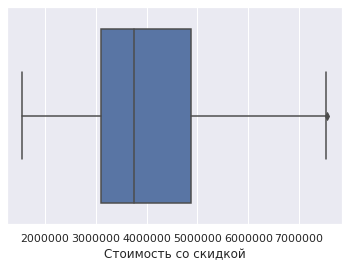

In [57]:
sns.boxplot(dataset['Стоимость со скидкой'])

In [58]:
#sns.pairplot(dataset)

# Генерация фичей

In [59]:
dataset['feat_4_очередь'] = dataset['Очередь'].replace({'4 очередь': 1, '2 очередь': 0})
dataset.drop('Очередь', axis=1, inplace=True)

In [60]:
dataset['feat_жилая_квартира'] = dataset['Тип объекта'].replace({'квартира': 1, 'нежилое': 0})
dataset.drop(['Под тип объекта', 'Тип объекта'], axis=1, inplace=True)

In [61]:
dummies = pd.get_dummies(dataset.loc[:, dataset.dtypes == object])

In [62]:
dataset = pd.concat([dataset.loc[:, dataset.dtypes != object], dummies], axis=1)

In [63]:
dataset = dataset.loc[dataset['Месяц продаж'].notnull()].copy(deep=True)

# Baseline модель

In [64]:
dataset.corr(method='spearman')['Стоимость со скидкой'].sort_values(ascending=False)

Стоимость со скидкой                1.00
Площадь по БТИ общая (расчетная)    0.80
Площадь по БТИ без летних           0.80
Комнат                              0.71
Площадь по БТИ жилая                0.63
                                    ... 
план_1_Л                           -0.32
Cтудийности_1ккв                   -0.47
Состояние объекта_Оценка             nan
Состояние объекта_Стр. Резерв        nan
Состояние объекта_Ус. Бронь          nan
Name: Стоимость со скидкой, Length: 71, dtype: float64

In [65]:
X = dataset.drop('Стоимость со скидкой', axis=1).copy(deep=True)

In [66]:
y = dataset['Стоимость со скидкой'].copy(deep=True)

In [67]:
X.shape, y.shape

((5439, 70), (5439,))

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
clf = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=17)

In [71]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=17, verbose=0,
                      warm_start=False)

In [72]:
pred = clf.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(pred, y_test))

171101.36214224776

In [74]:
clf.feature_importances_

array([1.56799835e-01, 3.18584606e-03, 4.61653104e-02, 8.33614582e-03,
       1.74527146e-03, 2.24249409e-03, 9.17214768e-02, 6.88983342e-03,
       6.55885762e-01, 4.21739701e-03, 5.92720937e-04, 2.11546200e-04,
       4.08938412e-04, 9.09128040e-03, 5.48781601e-05, 7.38970704e-05,
       8.20727762e-05, 4.12837888e-04, 5.74654558e-04, 2.21442477e-03,
       1.79809765e-04, 0.00000000e+00, 8.73715656e-06, 1.88256107e-05,
       1.36896752e-05, 1.07173580e-06, 0.00000000e+00, 0.00000000e+00,
       1.85962030e-03, 8.83022199e-04, 2.94844005e-04, 4.26769522e-04,
       1.79568206e-04, 8.91061430e-05, 5.88745295e-05, 1.96893165e-04,
       3.33812959e-05, 4.98258409e-05, 2.04266341e-05, 2.19013186e-06,
       2.88821221e-06, 4.67197958e-04, 2.23316443e-04, 1.09410369e-05,
       3.98439973e-04, 6.03070441e-04, 2.76994880e-04, 3.22175523e-05,
       1.39377224e-04, 1.67671594e-05, 2.90295432e-06, 5.40880095e-07,
       4.50757527e-04, 2.11809108e-04, 1.99386995e-04, 5.68031825e-05,
      

In [75]:
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), list(X)), 
             reverse=True))

[(0.6559, 'Площадь по БТИ общая (расчетная)'), (0.1568, 'Год продаж'), (0.0917, 'Площадь по БТИ без летних'), (0.0462, 'Месяц продаж'), (0.0091, 'Cтудийности_2ккв'), (0.0083, 'Номер корпуса'), (0.0069, 'Площадь по БТИ жилая'), (0.0042, 'Этаж (ряд)'), (0.0032, 'Комнат'), (0.0022, 'Номер п/п секции (размещения)'), (0.0022, 'Застройка_ПРИГОРОД'), (0.0019, 'Этап_1 этап'), (0.0017, 'Номер на площадке (в ряду)'), (0.0009, 'Этап_2 этап'), (0.0006, 'план_2_0'), (0.0006, 'Застройка_ЛЮБЕРЦЫ'), (0.0006, 'feat_4_очередь'), (0.0005, 'план_2_None'), (0.0005, 'план_1_Л'), (0.0004, 'план_1_У'), (0.0004, 'план_1_None'), (0.0004, 'feat_жилая_квартира_Нежилое'), (0.0004, 'feat_жилая_квартира_Жилое'), (0.0004, 'Cтудийности_Студия'), (0.0004, 'Cтудийности_1ккв(с)'), (0.0003, 'план_2_П'), (0.0003, 'план_2_ДС'), (0.0003, 'план_2_1'), (0.0003, 'Этап_3 этап'), (0.0002, 'план_2_ДД'), (0.0002, 'план_2_Д'), (0.0002, 'план_1_Р'), (0.0002, 'план_1_Г'), (0.0002, 'план_1_А'), (0.0002, 'Застройка_ПУТИЛКОВО'), (0.0002,

In [76]:
#!pip install eli5

In [77]:
import eli5

Using TensorFlow backend.


In [78]:
eli5.explain_weights(clf, feature_names = list(X))

Weight,Feature
0.6559 ± 0.3408,Площадь по БТИ общая (расчетная)
0.1568 ± 0.0193,Год продаж
0.0917 ± 0.3390,Площадь по БТИ без летних
0.0462 ± 0.0057,Месяц продаж
0.0091 ± 0.0302,Cтудийности_2ккв
0.0083 ± 0.0041,Номер корпуса
0.0069 ± 0.0038,Площадь по БТИ жилая
0.0042 ± 0.0021,Этаж (ряд)
0.0032 ± 0.0187,Комнат
0.0022 ± 0.0014,Номер п/п секции (размещения)


In [79]:
#!pip install shap

In [80]:
import shap

In [81]:
explainer = shap.TreeExplainer(clf)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [82]:
shap_values = explainer.shap_values(X_test[:1000])

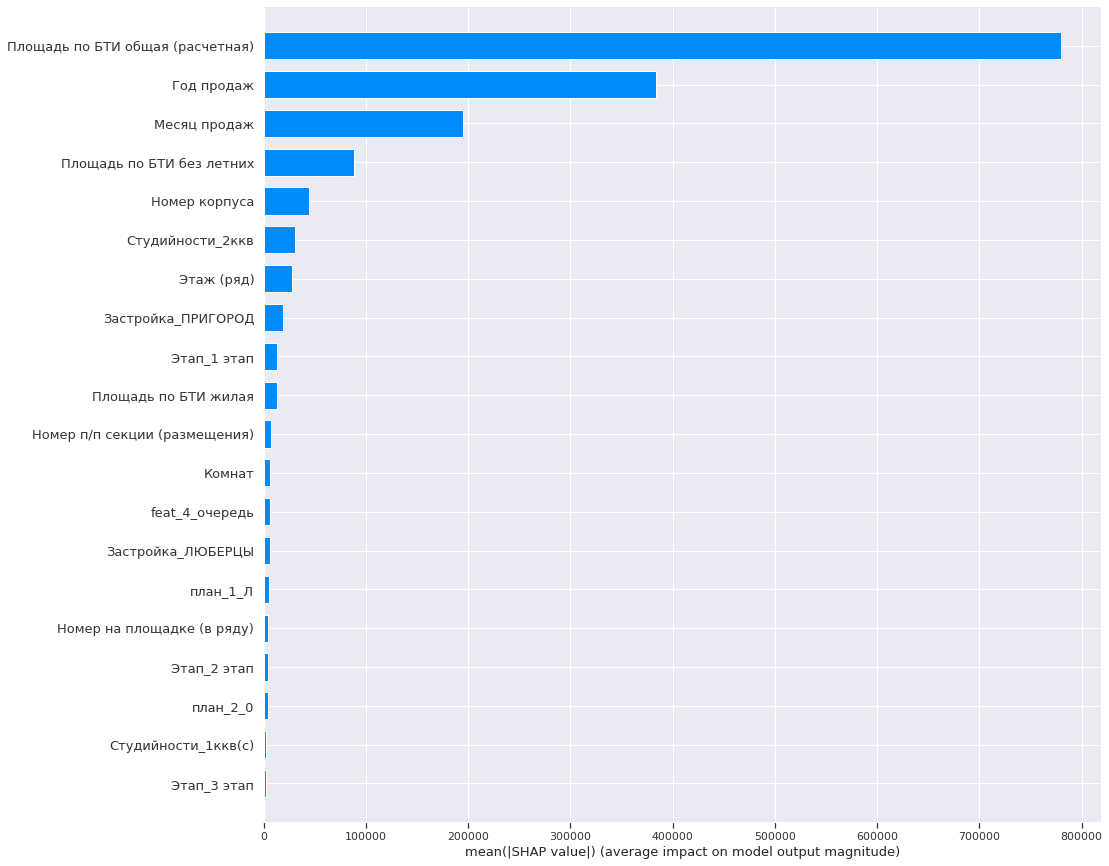

In [83]:
shap.summary_plot(shap_values, X_test[:1000], plot_size=(15, 15), plot_type='bar')

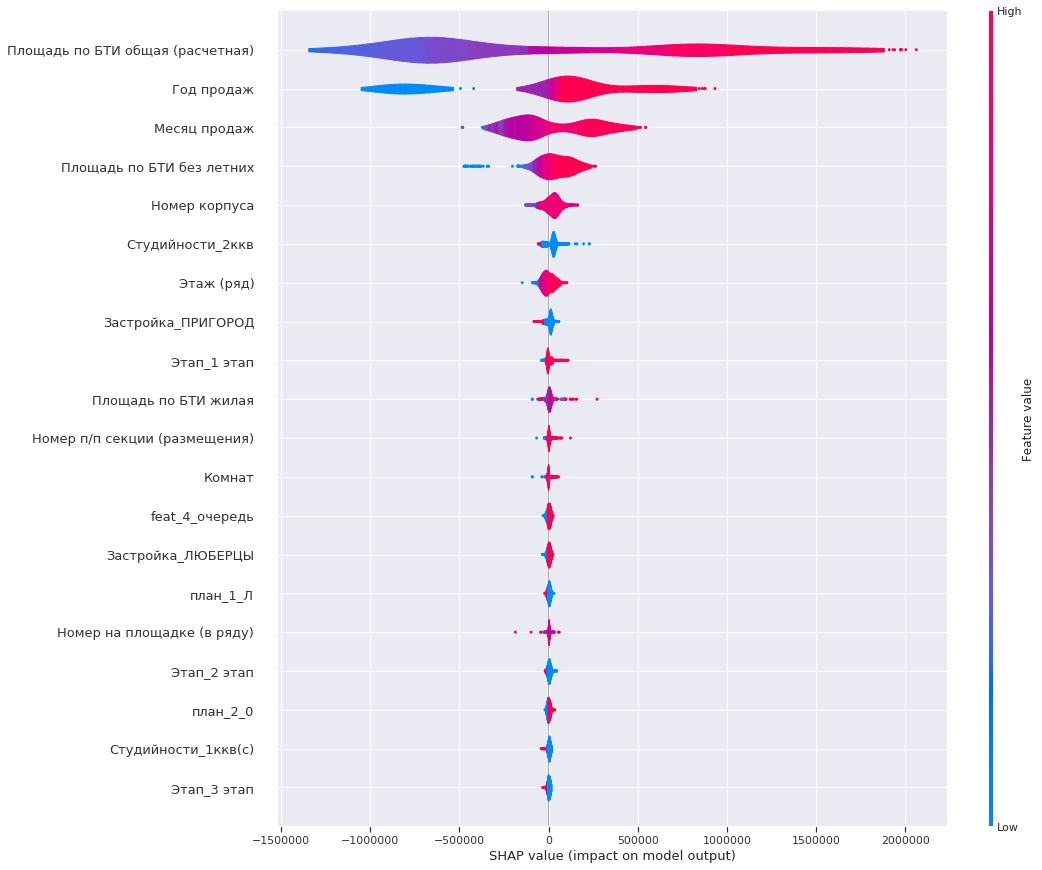

In [84]:
shap.summary_plot(shap_values, X_test[:1000], plot_size=(15, 15), plot_type='violin')

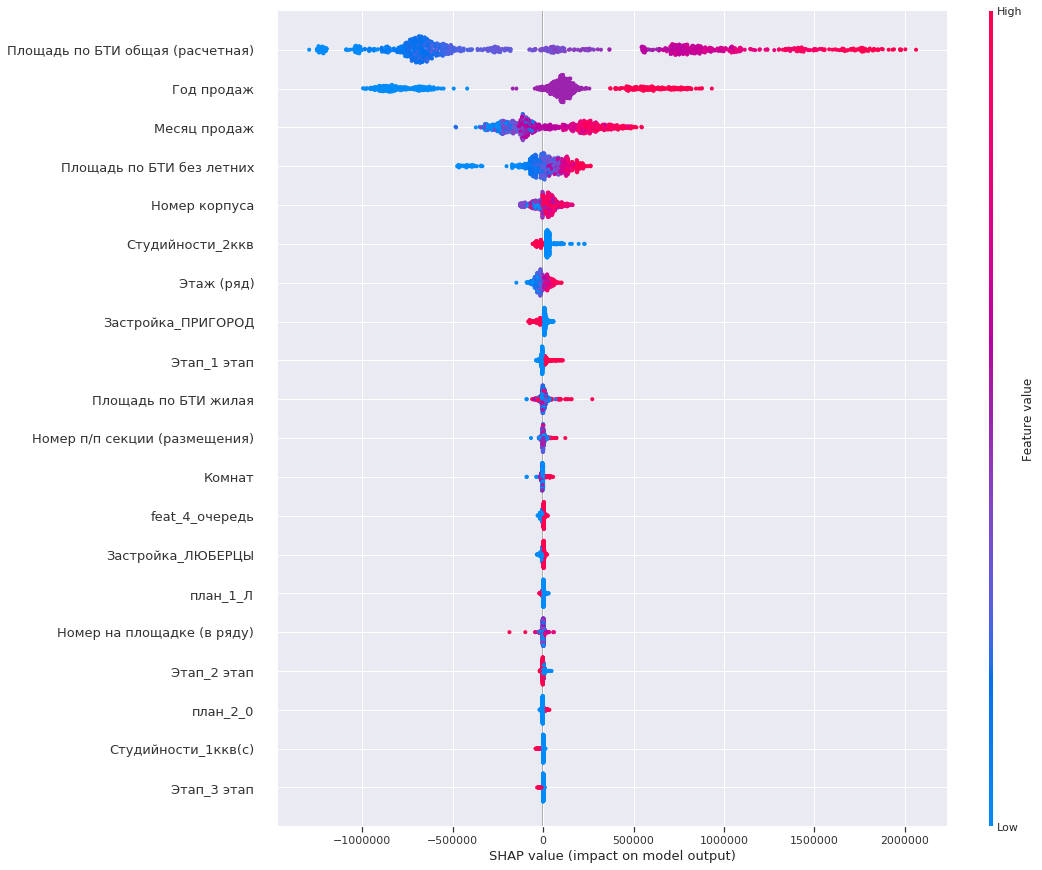

In [85]:
shap.summary_plot(shap_values, X_test[:1000], plot_size=(15, 15), plot_type='dot')

In [86]:
dataset.corr().to_excel(OLD_DATA_PATH + 'corr.xlsx')